# Point and Local Operators
## Computer Vision and Image Processing - Lab Session 4
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it - Riccardo Spezialetti, riccardo.spezialetti@unibo.it

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Point Operators: Histogram

Point Operators are image processing operators aimed at enhancing the quality of the input image(e.g. the contrast).
Most of such operators rely on the computation of the gray-level histogram (intensity histogram) of the input image.
Loaded a **grayscale** image:

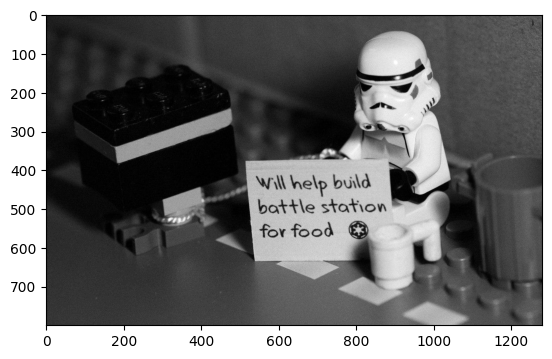

In [2]:
img = cv2.imread("LabSession4Images/image.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

We can compute its gray-level histogram using **np.histogram(flat_image, bins=256, range=[0,256])**

Where:
* **flat_image**: image flattened to be a 1D array
* **bins**: bounds of the bins. If bins is an integer, the bounds are all numbers from minimum to maximum (exluded). Otherwise, they can be also a custom sequence.
* **range**: minimum and maximum values of our histograms.

Bins will have 257 elements, because Numpy calculates bins as 0-0.99, 1-1.99, 2-2.99 etc. So final range would be 255-255.99. The last value 256 is the last edge of the last bin but it is excluded.

In [3]:
hist, bins = np.histogram(img.flatten(),256,[0,256])
print("Histogram shape: ", hist.shape)
print("Bins shape: ", bins.shape)

Histogram shape:  (256,)
Bins shape:  (257,)


Where __hist[i]__ are the number of pixels with the gray-scale value $i$. Bins are the indexes of each bin (i.e. numbers from 0 to 255).

Let us see how many pixels have the value 20 in our image:

In [4]:
grayscale_value = 20
print(hist[grayscale_value])

3553


Let us plot the histogram:

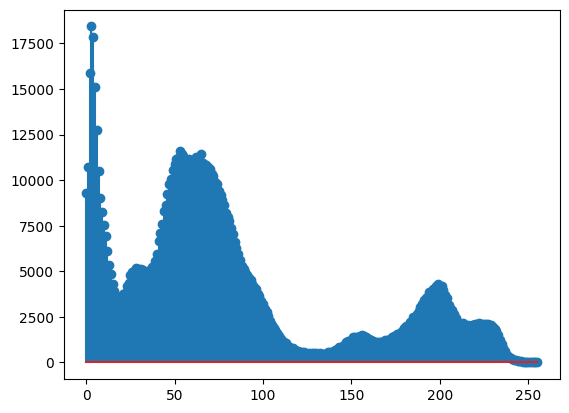

In [8]:
plt.stem(hist, use_line_collection=True)
plt.show()

## Point Operators Examples: Exponential Operator

It is sometimes desirable to selectively enhance the contrast in either dark (under-exposed) or bright (over-exposed) areas of the image. Linear stretching, though, would expand the contrast uniformly. However, a non-linear mapping, such as the Exponential Operator, can be deployed:

<img src="LabSession4Images/exp_op.png" width="320">

Thus, taking $r<1$ would stretch the intensity dynamics of dark areas and shrink that of bright ones, which turns out effective to improve under-exposed images. The opposite behaviour is achieved with $r>1$, which therefore can be used to enhance over-exposed images.

The operator is also known as __gamma correction__, due to its widespread use to compensate for the exponential voltage-to-intensity mapping ($I=V^r$) of old CRT monitors (often  $r=2.2$, i.e. darkening), which can be compensated by brightening  the image ($r'=\frac{1}{r}=0.45$) before displaying. 

Given an exponent $r$, $P_{out}$ the output pixel value and $P_{in}$ the input pixel value, the formula for the exponential operator is the following:

$P_{out}=255*(\frac{P_{in}}{255})^r$

## Local Operators: Convolutions and Correlations 

Local Operators compute the new intensity of a pixel, p, based on the intensities of those belonging to a neighbourhood of p.

<img src="LabSession4Images/local_op.png" width="320">

An important sub-class is given by the so called **Linear Shift-Invariant** (LSI) operators.
LSI operators are defined **convolving** a kernel with an image.

However, we know that **convolutions and correlations** are the same if we have a **symmetric** kernel respect to the **origin**:

<img src="LabSession4Images/conv_corr.png" width="128">

Practically, local operator kernels are usually symmetric about the origin so usually we compute **correlations** instead of convolutions because they are **easier to implement**. In case we have not symmetric filter respect to the origin we can still use correlations but we need to first **flip the kernel**.

Given an image and a kernel (aka filter) in OpenCV we can perform a correlation with the following command:

**cv2.filter2D(image, -1, kernel, anchor)**

where **anchor** of the kernel indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.

If we need to compute a convolution we need to flip the kernel using:

**cv2.flip(kernel)**

In case of flip we need to set the new anchor to (kernel.cols - anchor.x - 1, kernel.rows - anchor.y - 1).

## Local Operators: Some Peculiar Filters
### Gaussian filter
Gaussian filter is a special case of LSI operator where we sample from a 2D gaussian the values of our kernel.  

<img src="LabSession4Images/gaussian.png" width="320">

Given standard deviation $\sigma$ and kernel size we can obtain a 1D gaussian kernel in OpenCV with:

**gk = cv2.getGaussianKernel(kernel_size,sigma)**

which 1D having shape $(KernelSize , 1)$

If we want a 2D gaussian filter with both $\sigma_x$ and $\sigma_y$ having the same value we can multiply the two 1D kernels with:

**gk_2D = gk.dot(gk.transpose())**

Otherwise, we can obtain the same result applying first the 1D gaussian kernel **gk** and then, applying its tranposed one **gk$^T$**. Applying twice a 1D kernel instead of a 2D filter can be faster, expecially in case of big kernels.

We can also use an high level API of OpenCV which given the kernel size and sigmas compute the gaussian filtering:

**gauss_out = cv2.GaussianBlur(image, (k_size,k_size) , sigma)**

### Bilateral filter

<img src="LabSession4Images/bilateral.png" width="512">

Bilateral filter is highly effective at **noise removal** while **preserving edges**. 

The operation is **slower** compared to other filters. 

**Gaussian filters** is a function of **space** alone and does not consider whether pixels have almost the same intensity value or not resulting in blurred edges. 

On the other hand, the **bilateral filter** also uses a **Gaussian filter** in the **space** domain, but it also uses one more (multiplicative) **Gaussian filter** component which is a function of **pixel intensity differences**. 

The Gaussian function of space makes sure that only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.

We can apply a bilateral filter in OpenCV with:

**cv2.bilateralFilter(image, filter_size, sigmaColor, sigmaSpace)**.